<a href="https://colab.research.google.com/github/mizan-25/Deep_Learning_NN/blob/main/RecurrentNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementing Recurrent Neural Network using python,Ker

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
training_data = pd.read_csv('/content/drive/MyDrive/FB_training_data.csv')
training_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000
5,2015-01-09,78.199997,78.620003,77.199997,77.739998,77.739998,21157000
6,2015-01-12,77.839996,78.000000,76.209999,76.720001,76.720001,19190200
7,2015-01-13,77.230003,78.080002,75.849998,76.449997,76.449997,25179600
8,2015-01-14,76.419998,77.199997,76.029999,76.279999,76.279999,25918600
9,2015-01-15,76.400002,76.570000,73.540001,74.050003,74.050003,34134000


In [ ]:
training_data = training_data.iloc[:, 1].values

In [ ]:
type(training_data)

numpy.ndarray

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
training_data = scaler.fit_transform(training_data.reshape(-1, 1))

In [ ]:
x_training_data = []

y_training_data =[]

In [ ]:
for i in range(40, len(training_data)):

    x_training_data.append(training_data[i-40:i, 0])

    y_training_data.append(training_data[i, 0])

In [ ]:
x_training_data = np.array(x_training_data)

y_training_data = np.array(y_training_data)

In [ ]:
print(x_training_data.shape)

print(y_training_data.shape)

(1218, 40)
(1218,)


In [ ]:
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0], 

                                               x_training_data.shape[1], 

                                               1))

In [ ]:
print(x_training_data.shape)

(1218, 40, 1)


In [ ]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import Dropout

In [ ]:
rnn = Sequential()

In [ ]:
rnn.add(LSTM(units = 45, return_sequences = True, input_shape = (x_training_data.shape[1], 1)))

In [ ]:
rnn.add(Dropout(0.2))

In [ ]:
rnn.add(LSTM(units = 45, return_sequences = True))

rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 45, return_sequences = True))

rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 45))

rnn.add(Dropout(0.2))

In [ ]:
rnn.add(Dense(units = 1))

In [ ]:
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
rnn.fit(x_training_data, y_training_data, epochs = 100, batch_size = 32)

Epoch 1/100
39/39 [==============================] - 15s 95ms/step - loss: 0.0454
Epoch 2/100
39/39 [==============================] - 4s 98ms/step - loss: 0.0066
Epoch 3/100
39/39 [==============================] - 5s 137ms/step - loss: 0.0066
Epoch 4/100
39/39 [==============================] - 4s 106ms/step - loss: 0.0062
Epoch 5/100
39/39 [==============================] - 4s 99ms/step - loss: 0.0062
Epoch 6/100
39/39 [==============================] - 4s 109ms/step - loss: 0.0061
Epoch 7/100
39/39 [==============================] - 5s 131ms/step - loss: 0.0060
Epoch 8/100
39/39 [==============================] - 4s 95ms/step - loss: 0.0055
Epoch 9/100
39/39 [==============================] - 4s 96ms/step - loss: 0.0058
Epoch 10/100
39/39 [==============================] - 6s 144ms/step - loss: 0.0049
Epoch 11/100
39/39 [==============================] - 4s 113ms/step - loss: 0.0050
Epoch 12/100
39/39 [==============================] - 4s 96ms/step - loss: 0.0051
Epoch 13/100
39/39

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/FB_test_data.csv')

test_data = test_data.iloc[:, 1].values

In [ ]:
print(test_data.shape)

(21,)


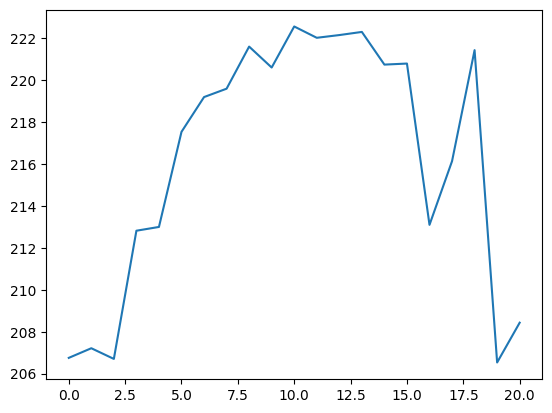

In [ ]:
plt.plot(test_data)

In [ ]:
unscaled_training_data = pd.read_csv('/content/drive/MyDrive/FB_training_data.csv')

unscaled_test_data = pd.read_csv('/content/drive/MyDrive/FB_test_data.csv')

In [ ]:
all_data = pd.concat((unscaled_training_data['Open'], unscaled_test_data['Open']), axis = 0)

In [ ]:
x_test_data = all_data[len(all_data) - len(test_data) - 40:].values

In [ ]:
x_test_data = np.reshape(x_test_data, (-1, 1))

#Scaling Our Test Data

In [ ]:
x_test_data = scaler.transform(x_test_data)

In [ ]:
final_x_test_data = []

for i in range(40, len(x_test_data)):

    final_x_test_data.append(x_test_data[i-40:i, 0])

final_x_test_data = np.array(final_x_test_data)

In [ ]:
final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0], 
                                                   final_x_test_data.shape[1], 1))

In [ ]:
predictions = rnn.predict(final_x_test_data)

1/1 [==============================] - 2s 2s/step


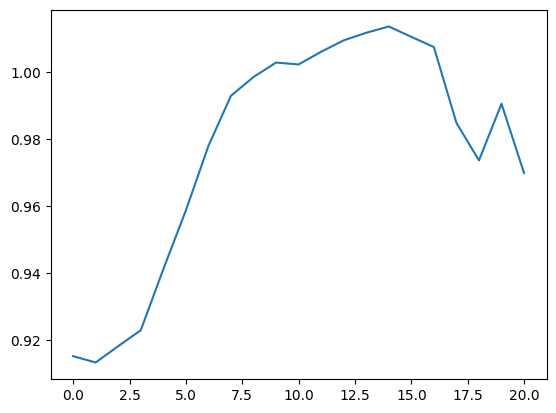

In [ ]:
plt.clf()
plt.plot(predictions)

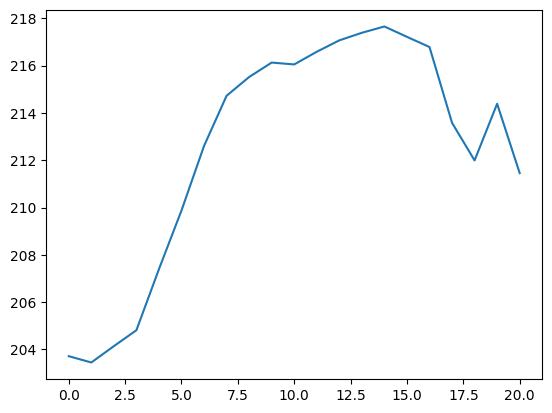

In [ ]:
unscaled_predictions = scaler.inverse_transform(predictions)

plt.clf() #This clears the first prediction plot from our canvas

plt.plot(unscaled_predictions)

Text(0.5, 1.0, 'Facebook Stock Price Predictions')

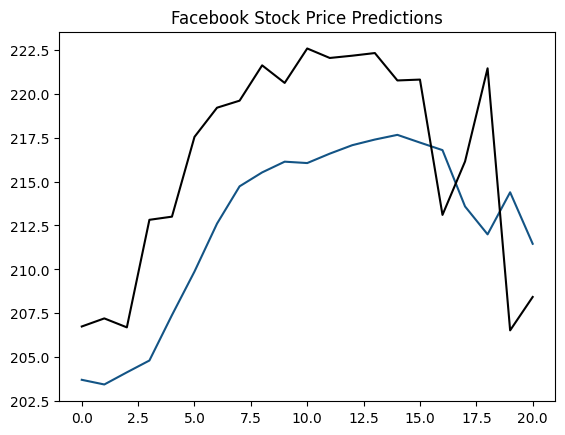

In [ ]:
plt.plot(unscaled_predictions, color = '#135485', label = "Predictions")

plt.plot(test_data, color = 'black', label = "Real Data")

plt.title('Facebook Stock Price Predictions')